In [159]:
import numpy as np
import sklearn as sk
import gower
from sklearn import metrics
from sklearn import feature_selection
from sklearn import decomposition
from sklearn import cluster
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt
%matplotlib inline

In [175]:
df = pd.read_csv("../data/cleaned_missing_kept_outlier_removed.csv")

In [176]:
df.drop([
    "CREATED_ON",
    "LAST_LOGIN",
    "SERVICE_X_DATE",
    "PACKAGE_CHANGE_DATE",
    "SUPERUSER_LAST_LOGIN",
    "ACCOUNTANT_LAST_LOGIN"
    ], axis=1, inplace=True)

In [177]:
df[["LINE_OF_BUSINESS", "SIZE_CODE", "STATUS_CODE"]] = df[["LINE_OF_BUSINESS", "SIZE_CODE", "STATUS_CODE"]].astype(str).replace('nan',np.nan)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27037 entries, 0 to 27036
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LINE_OF_BUSINESS              20298 non-null  object 
 1   SIZE_CODE                     21146 non-null  object 
 2   PACKAGE_TYPE                  27008 non-null  object 
 3   PREVIOUS_PACKAGE_TYPE         25892 non-null  object 
 4   SERVICE_1_COUNT               27033 non-null  float64
 5   SERVICE_2_COUNT               27033 non-null  float64
 6   SERVICE_2_TOTAL               27033 non-null  float64
 7   SERVICE_3_COUNT               27033 non-null  float64
 8   SUPERUSER_ID                  27037 non-null  float64
 9   ACCOUNTANT_ID                 27037 non-null  float64
 10  GROSS_INCOME                  18785 non-null  float64
 11  STATUS_CODE                   21148 non-null  object 
 12  RATING_CODE                   20322 non-null  float64
 13  C

In [164]:
print(df.var(axis=0).mean())
print(df.var(axis=0))

0.13613576156090873
SERVICE_1_COUNT                 0.002085
SERVICE_2_COUNT                 0.000297
SERVICE_2_TOTAL                 0.005429
SERVICE_3_COUNT                 0.003063
SUPERUSER_ID                    0.238132
ACCOUNTANT_ID                   0.036509
GROSS_INCOME                    0.002552
RATING_CODE                     0.860172
CREATED_ON_ACTIVE               0.149405
LAST_LOGIN_ACTIVE               0.246750
SERVICE_X_DATE_ACTIVE           0.047240
PACKAGE_CHANGE_DATE_ACTIVE      0.040591
SUPERUSER_LAST_LOGIN_ACTIVE     0.249086
ACCOUNTANT_LAST_LOGIN_ACTIVE    0.024589
dtype: float64


C:\Users\anonym\AppData\Local\Temp/ipykernel_2724/3486316742.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var(axis=0).mean())
C:\Users\anonym\AppData\Local\Temp/ipykernel_2724/3486316742.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var(axis=0))


Based on the variances, we can drop two very homogenous columns: `SERVICE_2_COUNT` and `SERVICE_2_TOTAL`.

In [179]:
df.drop(["SERVICE_2_COUNT", "SERVICE_2_TOTAL", ], axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'GROSS_INCOME'}>]], dtype=object)

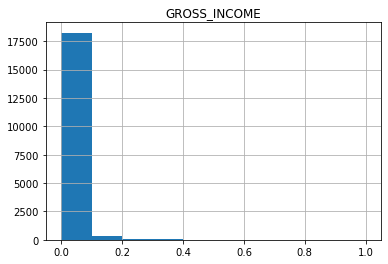

In [166]:
df.hist("GROSS_INCOME")

In [167]:
print(len(df))
for col in df.columns:
    uvals = df[col].unique()
    print(col)
    print(len(uvals))
    if len(uvals) < 50:
        print(uvals)
    print()

27037
LINE_OF_BUSINESS
474

SIZE_CODE
19
['91406695.0' '91406690.0' '91406692.0' '91406694.0' '91406683.0' nan
 '91406697.0' '91406693.0' '91406696.0' '91406698.0' '91406688.0'
 '91406682.0' '91406685.0' '91406699.0' '91406687.0' '91406684.0'
 '91406686.0' '91406691.0' '91406689.0']

PACKAGE_TYPE
11
['Free_tier_0' 'Hibernated' 'paid_tier_1' 'Hibernated_2' 'Freemium'
 'paid_tier_2' 'Free_tier_1' nan 'Free_tier_2' 'Free_tier_3'
 'Free_tier_promo']

PREVIOUS_PACKAGE_TYPE
14
['Free_tier_0' 'Hibernated' 'paid_tier_1' 'S' 'Hibernated_2' 'Freemium'
 'paid_tier_2' 'Free_tier_1' 'Free_tier_2' 'M' nan 'ExleX' 'Free_tier_3'
 'Free_tier_promo']

SERVICE_1_COUNT
265

SERVICE_3_COUNT
292

SUPERUSER_ID
2
[1. 0.]

ACCOUNTANT_ID
2
[0. 1.]

GROSS_INCOME
16353

STATUS_CODE
11
['91406700.0' '91406713.0' nan '91406701.0' '91406705.0' '91406710.0'
 '91406711.0' '91406702.0' '91406714.0' '91406708.0' '91406715.0']

RATING_CODE
5
[ 4.  1.  2. nan  3.]

CREATED_ON_ACTIVE
2
[False  True]

LAST_LOGIN_ACTIVE
2
[F

In [168]:
print(len(df))
print(len(df.columns))
cat_cols = df.select_dtypes(["object", "bool"]).columns
print(cat_cols)
for col in cat_cols:
    print(col)
    uvals, cnts = np.unique(df[col].astype(str), return_counts=True)
    print(len(uvals))
    print(uvals)
    print(cnts)
    print()

27037
18
Index(['LINE_OF_BUSINESS', 'SIZE_CODE', 'PACKAGE_TYPE',
       'PREVIOUS_PACKAGE_TYPE', 'STATUS_CODE', 'CREATED_ON_ACTIVE',
       'LAST_LOGIN_ACTIVE', 'SERVICE_X_DATE_ACTIVE',
       'PACKAGE_CHANGE_DATE_ACTIVE', 'SUPERUSER_LAST_LOGIN_ACTIVE',
       'ACCOUNTANT_LAST_LOGIN_ACTIVE', 'COUNTY'],
      dtype='object')
LINE_OF_BUSINESS
474
['10114.0' '10124.0' '10134.0' '10314.0' '10324.0' '10394.0' '10414.0'
 '10514.0' '10524.0' '10614.0' '10714.0' '10724.0' '10734.0' '10824.0'
 '10834.0' '10844.0' '10854.0' '10864.0' '10894.0' '10914.0' '10924.0'
 '11014.0' '11024.0' '11034.0' '11054.0' '11074.0' '13304.0' '13914.0'
 '13924.0' '13944.0' '13954.0' '13964.0' '13994.0' '14124.0' '14134.0'
 '14144.0' '14194.0' '14314.0' '15124.0' '15204.0' '16104.0' '16214.0'
 '16224.0' '16234.0' '16244.0' '16294.0' '17124.0' '17214.0' '17224.0'
 '17234.0' '17294.0' '18114.0' '18124.0' '18134.0' '18144.0' '18204.0'
 '20114.0' '20134.0' '20144.0' '20164.0' '20204.0' '20304.0' '20414.0'
 '20424.0' '20

Unfortunately, based on the number of values in each category, there is no too homogenous categorical column that we could remove.

To further decrease the number of features, a wrapper method will be used on a sample of 500 exmples of the data, repeated with 5 different random states.

In [169]:
def sample_df(d:pd.DataFrame, num:int = 200, seed:int = 0):
    samp = d.sample(num, random_state=seed)
    samp_gdist = gower.gower_matrix(samp)
    samp_gdist[np.isnan(samp_gdist)] = 0.9
    np.fill_diagonal(samp_gdist, 0)
    return samp_gdist

In [171]:
test_df = df.copy(deep=True)
print("df copied")
order_to_remove_in = []
removable = ["BASELINE"] # Performance without removing any feature
removable.extend(df.columns)
while len(removable) > 3:
    col_sil = {}
    for col in removable:
        pos_drop = test_df.loc[:, test_df.columns != col]
        sils = []
        clus = []
        for k in range(10):
            samp = sample_df(pos_drop, seed=k)
            ss = []
            for e in [0.15, 0.25]:
                dbscan_model = cluster.DBSCAN(eps=e, metric="precomputed", n_jobs=8)
                labels = dbscan_model.fit_predict(samp)
                cl, cnt = np.unique(labels, return_counts=True)
                if len(cnt) > 2:
                    s = metrics.silhouette_score(samp, labels, metric="precomputed")
                    ss.append(s)
                else:
                    ss.append(-1)
            sils.append(np.max(ss))
        col_sil[col] = np.mean(sils)
    worst_col = max(col_sil, key=col_sil.get)
    print(worst_col, col_sil[worst_col])
    if worst_col == "BASELINE":
        break
    test_df.drop(worst_col, axis=1, inplace=True)
    removable.remove(worst_col)
    order_to_remove_in.append(worst_col)
print(order_to_remove_in, removable)

df copied
COUNTY 0.15955791473388672
SIZE_CODE 0.23158430457115173
LAST_LOGIN_ACTIVE 0.2598163738846779
SERVICE_X_DATE_ACTIVE 0.26455217897891997
LINE_OF_BUSINESS 0.3822139412164688
RATING_CODE 0.4372649133205414
GROSS_INCOME 0.5509047180414199
STATUS_CODE 0.6493815958499909
SUPERUSER_LAST_LOGIN_ACTIVE 0.7174884676933289
CREATED_ON_ACTIVE 0.7358583062887192
ACCOUNTANT_ID 0.7549305
SUPERUSER_ID 0.82507753
PREVIOUS_PACKAGE_TYPE 0.882361900806427
PACKAGE_TYPE 0.9583018660545349
SERVICE_3_COUNT 0.9829842


TypeError: ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode '?') according to the casting rule ''same_kind''

The order of dropping the columns and the silhouette score is something like this:
- `COUNTY`: 0.15955791473388672
- `SIZE_CODE`: 0.23158430457115173
- `LAST_LOGIN_ACTIVE`: 0.2598163738846779
- `SERVICE_X_DATE_ACTIVE`: 0.26455217897891997
- `LINE_OF_BUSINESS`: 0.3822139412164688
- `RATING_CODE`: 0.4372649133205414
- `GROSS_INCOME`: 0.5509047180414199
- `STATUS_CODE`: 0.6493815958499909
- `SUPERUSER_LAST_LOGIN_ACTIVE`: 0.7174884676933289
- `CREATED_ON_ACTIVE`: 0.7358583062887192
- `ACCOUNTANT_ID`: 0.7549305
- `SUPERUSER_ID`: 0.82507753
- `PREVIOUS_PACKAGE_TYPE`: 0.882361900806427
- `PACKAGE_TYPE`: 0.9583018660545349
- `SERVICE_3_COUNT`: 0.9829842
For now, arbiterarly choosing a cutoff at `RATING_CODE` as thats where the score goes above 0.5.

In [180]:
df.drop([
    "COUNTY",
    "SIZE_CODE",
    "LAST_LOGIN_ACTIVE",
    "SERVICE_X_DATE_ACTIVE",
    "LINE_OF_BUSINESS",
    "RATING_CODE"], axis=1, inplace=True)

In [181]:
df.head()

,PACKAGE_TYPE,PREVIOUS_PACKAGE_TYPE,SERVICE_1_COUNT,SERVICE_3_COUNT,SUPERUSER_ID,ACCOUNTANT_ID,GROSS_INCOME,STATUS_CODE,CREATED_ON_ACTIVE,PACKAGE_CHANGE_DATE_ACTIVE,SUPERUSER_LAST_LOGIN_ACTIVE,ACCOUNTANT_LAST_LOGIN_ACTIVE
0,Free_tier_0,Free_tier_0,0.0,0.0,1.0,0.0,0.004005,91406700.0,False,True,False,False
1,Free_tier_0,Free_tier_0,0.0,0.0,1.0,0.0,0.093252,91406700.0,False,True,False,False
2,Free_tier_0,Free_tier_0,0.0,0.0,1.0,0.0,0.001726,91406700.0,False,True,False,False
3,Free_tier_0,Free_tier_0,0.0,0.0,1.0,0.0,0.002651,91406700.0,False,True,False,False
4,Free_tier_0,Free_tier_0,0.0,0.0,0.0,0.0,NaN,91406713.0,False,True,False,False


In [182]:
#gdist = gower.gower_matrix(df)
#np.save("gower_dist_v4.npy", gdist)